# App Store Reviews
Reference: https://www.linkedin.com/pulse/how-scrape-app-store-reviews-4-simple-steps-using-python-kundi/

In [ ]:
!pip install app_store_scraper
from app_store_scraper import AppStore
import pandas as pd
import numpy as np
import json

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.4/58.4 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.0/128.0 kB 11.1 MB/s eta 0:00:00
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling chardet-5.2.0:
      Successfully uninstalled chardet-5.2.0
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.0.7
    Uninstalling urllib3-2.0.7:
      Successfully uninstalled urllib3-2.0.7
  Attempting uninstall: idna
    Found existing installation: idna 3.6
    Uninstalling idna-3.6:
      Successfully uninstalled idna-3.6
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
ERROR: pip's dependency resolver does not currently take into 

In [ ]:
gxs = AppStore(country='sg', app_name='gxs-bank', app_id = '1632183616')
gxs.review(how_many=600)

posb = AppStore(country='sg', app_name='posb-digibank', app_id = '1068416633')
posb.review(how_many=1600)

ocbc = AppStore(country='sg', app_name='ocbc-digital-mobile-banking', app_id = '292506828')
ocbc.review(how_many=5000)

ERROR:Base:Something went wrong: HTTPSConnectionPool(host='amp-api.apps.apple.com', port=443): Max retries exceeded with url: /v1/catalog/sg/apps/292506828/reviews?l=en-GB&offset=260&limit=20&platform=web&additionalPlatforms=appletv%2Cipad%2Ciphone%2Cmac (Caused by ResponseError('too many 429 error responses'))


In [ ]:
df = pd.DataFrame(np.array(gxs.reviews),columns=['review'])
df2 = df.join(pd.DataFrame(df.pop('review').tolist()))
#df2.head()

posb_df = pd.DataFrame(np.array(posb.reviews),columns=['review'])
posb_df2 = posb_df.join(pd.DataFrame(posb_df.pop('review').tolist()))
#posb_df2.head()

ocbc_df = pd.DataFrame(np.array(ocbc.reviews),columns=['review'])
ocbc_df2 = ocbc_df.join(pd.DataFrame(ocbc_df.pop('review').tolist()))
#ocbc_df2.head()

In [ ]:

df2.to_csv('gxs-apple-app-reviews.csv')
# files.download('gxs-apple-app-reviews.csv')

In [ ]:
posb_df2.to_csv('posb-apple-app-reviews.csv')
# files.download('posb-apple-app-reviews.csv')

In [ ]:
ocbc_df2.to_csv('ocbc-apple-app-reviews.csv')
# files.download('ocbc-apple-app-reviews.csv')

# Play Store Reviews
Reference: https://www.linkedin.com/pulse/how-scrape-google-play-reviews-4-simple-steps-using-python-kundi/

In [ ]:
!pip install google_play_scraper
from google_play_scraper import app
import pandas as pd
import numpy as np

In [ ]:
from google_play_scraper import Sort, reviews_all

sg_reviews = reviews_all(
    'sg.com.gxs.app',
    sleep_milliseconds=0, # defaults to 0
    lang='en', # defaults to 'en'
    country='sg', # defaults to 'us'
    sort=Sort.NEWEST, # defaults to Sort.MOST_RELEVANT
)

In [ ]:
df_gxs = pd.DataFrame(np.array(sg_reviews),columns=['review'])
# df_gxs = df.join(pd.DataFrame(df_gxs.pop('review').tolist())) # missing ~60+ rows, not sure why
df_gxs = pd.DataFrame(df_gxs.pop('review').tolist()) # all rows
df_gxs.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,68b47f84-f8f8-4361-bc53-3806a45c4dd3,Lin Yao,https://play-lh.googleusercontent.com/a/ACg8oc...,Not sure if i am already registered for the sa...,1,0,None,2024-04-03 12:39:35,"We're sorry to hear that you feel this way, Li...",2024-04-03 13:02:57,None
1,e3274e67-d290-4253-b967-b27736893806,kh lim,https://play-lh.googleusercontent.com/a/ACg8oc...,developer is nutshell brain i think proof of a...,1,0,None,2024-04-02 10:43:38,Hi Kh Lim. We're sorry to hear this. Please co...,2024-04-02 11:37:41,None
2,43172d2d-0b9c-48b7-8075-43517279c87f,Shaun Lee,https://play-lh.googleusercontent.com/a-/ALV-U...,i cant eve open the app now and purchase thing...,1,0,2.25.0,2024-03-30 10:28:36,Hi Shaun. We're sorry to hear this and we woul...,2024-03-30 11:17:48,2.25.0
3,563f91f0-e097-4340-a88e-9649af686201,Md Tarikul,https://play-lh.googleusercontent.com/a/ACg8oc...,Gif me mony plsse,5,0,2.25.0,2024-03-29 19:28:58,None,NaT,2.25.0
4,ac6c71af-4648-47f2-b7ba-5adda442230f,Lee Jia Xing,https://play-lh.googleusercontent.com/a-/ALV-U...,"Gxs is simple and easy to use, with a saving a...",5,15,2.25.0,2024-03-22 09:33:40,"Hey Jiaxing! Hope you love the new ""Favourites...",2024-03-22 09:55:00,2.25.0


In [ ]:

df_gxs.to_csv('gxs_playstore2.csv')
# files.download('gxs_playstore2.csv')

# Data Cleaning

In [ ]:
import pandas as pd
gxsapple=pd.read_csv('gxs-apple-app-reviews.csv', index_col=0)
gxsplaystore=pd.read_csv('gxs_playstore2.csv', index_col=0)
posbapple=pd.read_csv('posb-apple-app-reviews.csv', index_col=0)
ocbcapple=pd.read_csv('ocbc-apple-app-reviews.csv', index_col=0)

In [ ]:
ocbcapple.rating.unique()

array([5, 2, 4, 1, 3])

In [ ]:
gxsapple['title_review'] = gxsapple['title'] + ' : ' + gxsapple['review']

gxsapple['thumbsUp']= 0

gxsapple['developerResponse'] = gxsapple['developerResponse'].str.replace(r"\{'id': \d+, 'body':", "", regex=True)
gxsapple['developerResponse']=gxsapple['developerResponse'].str.rstrip("}")
gxsapple['developerResponse'] = gxsapple['developerResponse'].str.replace('"', '', regex=False)
gxsapple['developerResponse'] = gxsapple['developerResponse'].str.replace("'", '', regex=False)

gxsapple_dropped = gxsapple.drop(columns=['title', 'review', 'userName', 'isEdited', 'date'])

posbapple['title_review'] = posbapple['title'] + ' : ' + posbapple['review']
posbapple['thumbsUp']= 0
posbapple['developerResponse']=''
posbapple_dropped = posbapple.drop(columns=['title', 'review', 'userName', 'isEdited', 'date'])

ocbcapple['title_review'] = ocbcapple['title'] + ' : ' + ocbcapple['review']
ocbcapple['thumbsUp']= 0
ocbcapple['developerResponse']=''
ocbcapple_dropped = ocbcapple.drop(columns=['title', 'review', 'userName', 'isEdited', 'date'])

In [ ]:
gxsplaystore_dropped=gxsplaystore.drop(columns=['reviewId','userName','userImage','reviewCreatedVersion','at','repliedAt','appVersion'])
neworder=['replyContent', 'score', 'content', 'thumbsUpCount']
gxsplaystore_dropped=gxsplaystore_dropped[neworder]

gxsplaystore_dropped.head()

,replyContent,score,content,thumbsUpCount
0,"We're sorry to hear that you feel this way, Li...",1,Not sure if i am already registered for the sa...,0
1,Hi Kh Lim. We're sorry to hear this. Please co...,1,developer is nutshell brain i think proof of a...,0
2,Hi Shaun. We're sorry to hear this and we woul...,1,i cant eve open the app now and purchase thing...,0
3,NaN,5,Gif me mony plsse,0
4,"Hey Jiaxing! Hope you love the new ""Favourites...",5,"Gxs is simple and easy to use, with a saving a...",15


In [ ]:
gxsapple_dropped_renamed = gxsapple_dropped.rename(columns={
    'title_review': 'content',
    'thumbsUp': 'thumbsUpCount',
    'developerResponse': 'replyContent',
    'rating': 'score'
})

posbapple_dropped_renamed= posbapple_dropped.rename(columns={
    'title_review': 'content',
    'thumbsUp': 'thumbsUpCount',
    'developerResponse': 'replyContent',
    'rating': 'score'
})

ocbcapple_dropped_renamed= ocbcapple_dropped.rename(columns={
    'title_review': 'content',
    'thumbsUp': 'thumbsUpCount',
    'developerResponse': 'replyContent',
    'rating': 'score'
})

combined_reviews = pd.concat([gxsplaystore_dropped, gxsapple_dropped_renamed, posbapple_dropped_renamed, ocbcapple_dropped_renamed], axis=0, ignore_index=True)

combined_reviews.head()

,replyContent,score,content,thumbsUpCount
0,"We're sorry to hear that you feel this way, Li...",1,Not sure if i am already registered for the sa...,0
1,Hi Kh Lim. We're sorry to hear this. Please co...,1,developer is nutshell brain i think proof of a...,0
2,Hi Shaun. We're sorry to hear this and we woul...,1,i cant eve open the app now and purchase thing...,0
3,NaN,5,Gif me mony plsse,0
4,"Hey Jiaxing! Hope you love the new ""Favourites...",5,"Gxs is simple and easy to use, with a saving a...",15


In [ ]:

combined_reviews.to_csv("combined_reviews.csv")
# files.download('combined_reviews.csv')

# Sentiment Analysis

## HuggingFace Model Testing
Comparing various models' prediction against actual rating

In [ ]:
!pip install transformers
from transformers import pipeline
import pandas as pd
import seaborn as sns

In [ ]:
# dataset = pd.read_csv("combined_reviews.csv", index_col=0)
dataset = combined_reviews

In [ ]:
dataset[dataset.score.isna()==True]

,replyContent,score,content,thumbsUpCount


<Axes: xlabel='score', ylabel='Count'>

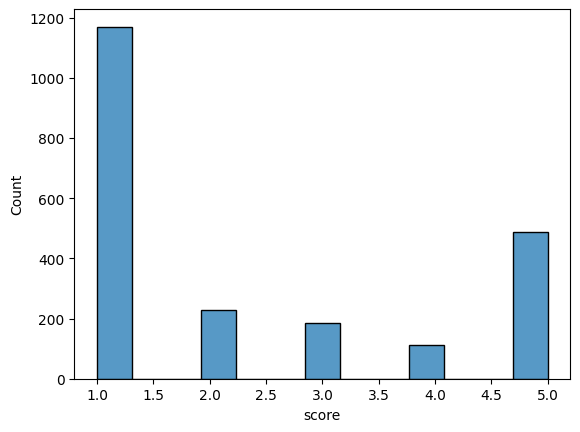

In [ ]:
sns.histplot(dataset.score) # uneven spread of ratings (mostly 1 or 5)

In [ ]:
score_sentiment = []
for score in dataset.score:
  if score > 3:
    score_sentiment.append(1) # Positive
  # elif score == 3:
  #   score_sentiment.append(0) # Neutral
  else:
    score_sentiment.append(-1) # Negative

In [ ]:
dataset['score_sentiment'] = score_sentiment

In [ ]:
dataset['score_sentiment'].value_counts()

score_sentiment
-1    1586
 1     602
Name: count, dtype: int64

In [ ]:
dataset.head()

,replyContent,score,content,thumbsUpCount,score_sentiment
0,"We're sorry to hear that you feel this way, Li...",1,Not sure if i am already registered for the sa...,0,-1
1,Hi Kh Lim. We're sorry to hear this. Please co...,1,developer is nutshell brain i think proof of a...,0,-1
2,Hi Shaun. We're sorry to hear this and we woul...,1,i cant eve open the app now and purchase thing...,0,-1
3,NaN,5,Gif me mony plsse,0,1
4,"Hey Jiaxing! Hope you love the new ""Favourites...",5,"Gxs is simple and easy to use, with a saving a...",15,1


In [ ]:

dataset.to_csv("sentiment.csv")

In [ ]:
def sentiment_accuracy(model):
  sentiment_pipeline = pipeline("sentiment-analysis", model=model)
  count = 0

  for row in range(len(dataset.content)):
    pred_sentiment = sentiment_pipeline(dataset.content[row])[0]['label']
    pred_sentiment = define(pred_sentiment)
    if pred_sentiment == dataset.score_sentiment[row]:
      count += 1

  acc = count/len(dataset.content)
  return acc

In [ ]:
# baseline model
baseline_model = 'distilbert/distilbert-base-uncased-finetuned-sst-2-english'

def define(pred):
  if pred == 'POSITIVE': return 1
  # elif pred == 'NEGATIVE': return -1
  else: return -1

sentiment_accuracy(baseline_model)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

0.8715722120658135

In [ ]:
# fin model
fin_model = 'yiyanghkust/finbert-tone'

def define(pred):
  if pred == 'Positive': return 1
  # elif pred == 'Negative': return -1
  else: return -1

sentiment_accuracy(fin_model)

config.json:   0%|          | 0.00/533 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/439M [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/226k [00:00<?, ?B/s]

0.8441499085923218

## **Finetuning** model to fit our bank reviews better
To fine tune our pre trained models with our data: https://huggingface.co/blog/sentiment-analysis-python
**take note that the labels are 0 and 1 not -1 and 1**


In [ ]:
datasettrain = pd.concat([posbapple_dropped_renamed, ocbcapple_dropped_renamed], axis=0, ignore_index=True)

In [ ]:
datasettest=pd.concat([gxsplaystore_dropped, gxsapple_dropped_renamed], axis=0, ignore_index=True)

In [ ]:
score_sentiment_train = []
for score in datasettrain.score:
  if score > 3:
    score_sentiment_train.append(1) # Positive
  else:
    score_sentiment_train.append(0) # Negative

score_sentiment_test = []
for score in datasettest.score:
  if score > 3:
    score_sentiment_test.append(1) # Positive
  else:
    score_sentiment_test.append(0) # Negative

In [ ]:
datasettrain['score_sentiment'] = score_sentiment_train
datasettest['score_sentiment']=score_sentiment_test

In [ ]:
datasettrain.head()

,score,content,thumbsUpCount,replyContent,score_sentiment
0,5,Face ID and OTP issues : The OTP to create a n...,0,,1
1,5,Easy to use & simple to understand : I find th...,0,,1
2,5,The best digital banking app in Singapore! : I...,0,,1
3,4,Accessing digital token when logged in. : Well...,0,,1
4,4,Payment Controls Monthly Spend Tracking : Unde...,0,,1


In [ ]:
# baseline model train
baseline_model_train = 'distilbert/distilbert-base-uncased-finetuned-sst-2-english'


In [ ]:
def sentiment_accuracy_test(model):
  sentiment_pipeline = pipeline("sentiment-analysis", model=model)
  count = 0

  for row in range(len(datasettest.content)):
    pred_sentiment = sentiment_pipeline(datasettest.content[row])[0]['label']
    pred_sentiment = define(pred_sentiment)
    if pred_sentiment == datasettest.score_sentiment[row]:
      count += 1

  acc = count/len(datasettest.content)
  return acc

In [ ]:
#finetuned version of baseline model
#finetuning was already done beforehand. FOr further info on the code refer to modeltrainingandtests.py

# baseline model train
baseline_model_finetune = 'ajiayi/finetuning-sentiment-model-bank_reviews-otherbank'

def define(pred):
  if pred == 'POSITIVE': return 1
  elif pred == 'NEGATIVE': return 0


sentiment_accuracy_test(baseline_model_finetune)

config.json:   0%|          | 0.00/823 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.25k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

0.9818731117824774

In [ ]:
import pandas as pd
from transformers import pipeline

def sentiment_analysis_negative_to_df(model_identifier):
    sentiment_pipeline = pipeline("sentiment-analysis", model=model_identifier)
    negative_indices = []

    for idx, row in datasettest.iterrows():
        pred_sentiment = sentiment_pipeline(row['content'])[0]['label']
        if pred_sentiment == 'NEGATIVE':
            negative_indices.append(idx)

    # Using the indices of negative rows to create a new DataFrame
    negative_df = datasettest.loc[negative_indices]

    return negative_df

# Replace 'model_identifier' with your model's identifier.
negative_df = sentiment_analysis_negative_to_df(baseline_model_finetune)
negative_df.head()

#this dataframe contains all negatively sentiment reviews. accuracy should be around 97% based on finetuned model.
#use this dataframe to generate responses to by the gpt. (just an idea)

,replyContent,score,content,thumbsUpCount,score_sentiment
0,"We're sorry to hear that you feel this way, Li...",1,Not sure if i am already registered for the sa...,0,0
1,Hi Kh Lim. We're sorry to hear this. Please co...,1,developer is nutshell brain i think proof of a...,0,0
2,Hi Shaun. We're sorry to hear this and we woul...,1,i cant eve open the app now and purchase thing...,0,0
5,We apologize for the inconvenience you had to ...,3,It always ask for finger identification even t...,0,0
6,"Hi Sean, we understand your concern and we wou...",1,What I've installed on my phone is none of you...,0,0


# Text analysis to obtain intent/insight
Possible ideas:
- Topic modelling
- Text summarisation

Keyword extraction techniques: https://www.analyticsvidhya.com/blog/2022/03/keyword-extraction-methods-from-documents-in-nlp/

In [ ]:
dataset.content[1]

In [ ]:
# text summarization, doesn't really work since sentences are too short
summarizer = pipeline("summarization", min_length=0, max_length=15)
summarizer(dataset.content[1])

In [ ]:
# topic modelling, idk.. doesn't seem to work too well on predefined topic list
#!pip install -U bertopic
from bertopic import BERTopic
topic_model = BERTopic.load("davanstrien/transformers_issues_topics")
topic, prob = topic_model.transform(dataset.content[1])

In [ ]:
# keyword extraction, keyBERT
!pip install keybert
from keybert import KeyBERT
kw_model = KeyBERT()
keywords = kw_model.extract_keywords(dataset.content[1])
print(keywords)

In [ ]:
# keyword extraction, rake-nltk
!pip install rake-nltk
!pip install nltk
from rake_nltk import Rake
import nltk
nltk.download('stopwords')
nltk.download('punkt')
r=Rake()
r.extract_keywords_from_text(dataset.content[1])
r.get_ranked_phrases()

Topic modelling (for data analysis) https://huggingface.co/heyitskim1912/TopicModelling
If we use gpt to reply to reviews, technically dunnid topic modelling, topic modelling will then be used more for data visualisation. (or can use to make life of gpt easier lol)

# Net Sentiment + Frequency of Words/Intents

Alternative to NPS since we don't have raw data for NPS

https://chattermill.com/blog/nps-calculator#:~:text=Calculating%20your%20net%20promoter%20score,number%20between%20%2D100%20and%20100.

In [ ]:
!pip install transformers
!pip install keybert
from transformers import pipeline
from keybert import KeyBERT

In [ ]:
gxs_reviews = pd.concat([gxsplaystore_dropped, gxsapple_dropped_renamed], axis=0, ignore_index=True)

In [ ]:
def summarise_sentiment(reviews): #havent test this fn

  '''
  Input:
  - reviews: dataset containing at least the following 2 columns ['content', 'thumbsUpCount']
  Output:
  - net sentiment score: numeric, between -100 and +100
  - neg_keywords: dictionary containing negative keywords, sorted descending
  - pos_keywords: dictionary containing positive keywords, sorted descending
  '''

  model = 'distilbert/distilbert-base-uncased-finetuned-sst-2-english' # maybe need to streamline this && change to trained model
  sentiment_pipeline = pipeline("sentiment-analysis", model=model)
  ns_score = 0

  kw_model = KeyBERT() # check if this is the best model to use
  neg_keywords = {}
  pos_keywords = {}

  for row in range(len(reviews)):
    pred_sentiment = sentiment_pipeline(reviews.content[row])[0]['label']
    keywords = kw_model.extract_keywords(reviews.content[row])
    if pred_sentiment == 'POSITIVE':
      pred_sentiment = 1
      for word in keywords:
        if word in pos_keywords:
          pos_keywords[word] += 1
        else:
          pos_keywords[word] = 1
    else:
      pred_sentiment = -1
      for word in keywords:
        if word in neg_keywords:
          neg_keywords[word] += 1
        else:
          neg_keywords[word] = 1
    ns_score += pred_sentiment * (reviews.thumbsUpCount[row]+1) # need to vectorise for faster runtime

  total = sum(reviews.thumbsUpCount) + len(reviews)
  ns_score = ns_score/total*100

  # sort positive and negative keywords in descending frequency
  pos_keywords = sorted(pos_keywords.items(), key=lambda x: x[1], reverse = True)
  neg_keywords = sorted(neg_keywords.items(), key=lambda x: x[1], reverse = True)

  return ns_score, pos_keywords, neg_keywords

In [ ]:
test_sentiment = summarise_sentiment(gxs_reviews)
print(test_sentiment[0])
print(test_sentiment[1][:5])
print(test_sentiment[2][:5])

# Using GPT to reply to reviews
*   finetune a gpt with review replies
*   
 test and see accuracy of gpt replies to content column with replies from gxs
(we need more data of companies replying to reviewers because our dataset is VERY SMALL)

In [ ]:
# from transformers import pipeline

# prompt = "Write an email about an alpaca that likes flan"
# model = pipeline(model="declare-lab/flan-alpaca-gpt4-xl")
# model(prompt, max_length=128, do_sample=True)

In [ ]:
# !pip install datasets
from datasets import load_dataset, Dataset

data = load_dataset("csv", data_files='combined_reviews.csv', split='train')
data_dict = data.train_test_split(test_size=0.1)

In [ ]:
data_dict

DatasetDict({
    train: Dataset({
        features: ['Unnamed: 0', 'replyContent', 'score', 'content', 'thumbsUpCount'],
        num_rows: 3239
    })
    test: Dataset({
        features: ['Unnamed: 0', 'replyContent', 'score', 'content', 'thumbsUpCount'],
        num_rows: 360
    })
})

In [ ]:
small_train_dataset = data_dict["train"].shuffle(seed=42).select(range(1000))
small_test_dataset = data_dict["test"].shuffle(seed=42).select(range(100))

In [ ]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("h2oai/h2o-danube-1.8b-chat")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [ ]:
def tokenize_function(examples):
    return tokenizer(examples['content'], truncation=True)

# tokenized_datasets = data.map(tokenize_function, batched=True)

tokenized_train = small_train_dataset.map(tokenize_function, batched=True)
tokenized_test = small_test_dataset.map(tokenize_function, batched=True)

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

ValueError: You need to specify either `text` or `text_target`.

In [ ]:
from transformers import AutoModelForSequenceClassification
model = AutoModelForSequenceClassification.from_pretrained("h2oai/h2o-danube-1.8b-chat", num_labels=5)

!pip install accelerate -U
from transformers import TrainingArguments
training_args = TrainingArguments(output_dir="test_trainer")

In [ ]:
import numpy as np
from datasets import load_metric

metric = load_metric("accuracy")

In [ ]:
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)

In [ ]:
from transformers import TrainingArguments, Trainer
training_args = TrainingArguments(output_dir="test_trainer", evaluation_strategy="epoch")

In [ ]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=small_train_dataset,
    eval_dataset=small_test_dataset,
    compute_metrics=compute_metrics,
)

In [ ]:
trainer.train()